In [10]:
pip install ucimlrepo


In [20]:

import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# prompt: uci skin dataset

from ucimlrepo import fetch_ucirepo

# fetch dataset
skin_segment = fetch_ucirepo(id=59)

# data (as pandas dataframes)
X = skin_segment.data.features
y = skin_segment.data.targets

#print(skin_segment.metadata)
#print(skin_segment.variables)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train['Class'])

print(grid.best_params_)
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
print(accuracy_score(y_test, grid_predictions))


In [21]:
from ucimlrepo import fetch_ucirepo

df = fetch_ucirepo(id=59)
df.head()

TypeError: 'NoneType' object is not callable

In [24]:
from ucimlrepo import fetch_ucirepo

df = fetch_ucirepo(id=59)
data = df.data
df = data.features
df.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [25]:
train_accs = []
test_accs = []
svm_best_params = []

for i in range(10):

  print('-------- Sample {}-------\n'.format(i))
  dfi = df.sample(frac=0.1)
  X = dfi.iloc[:, :-1].values
  y = dfi.iloc[:, -1].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Optimize the SVM using grid search with cross-validation
  param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [0.1, 0.01, 0.001, 0.0001],
      'kernel': ['linear', 'rbf', 'sigmoid']
  }
  grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=100, refit=True)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  svm_best_params.append(best_params)

  print(best_params)
  # Train and test the SVM with the best parameters
  svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], max_iter=1000)
  svm.fit(X_train, y_train)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  train_accs.append(train_acc)
  test_accs.append(test_acc)


-------- Sample 0-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.411 total time=   0.3s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.413 total time=   0.3s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.433 total time=   0.2s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.409 total time=   0.6s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.409 total time=   0.6s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

In [26]:

svm_best_params

[{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}]

In [27]:
test_accs

[0.545,
 0.545,
 0.5683333333333334,
 0.5333333333333333,
 0.5616666666666666,
 0.5666666666666667,
 0.5466666666666666,
 0.5016666666666667,
 0.5666666666666667,
 0.56]

In [28]:
final_df = pd.DataFrame(data=[test_accs, svm_best_params], index=['Accuracy', 'Parameters']).T
final_df


,Accuracy,Parameters
0,0.545,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
1,0.545,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
2,0.568333,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.533333,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
4,0.561667,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
5,0.566667,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
6,0.546667,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
7,0.501667,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
8,0.566667,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.56,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"


In [29]:
max_index = test_accs.index(max(test_accs))
max_index

2

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=max_index)


In [31]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
iterations = list()
acc_list = list()

for i in range(1000):
    x = i+1
    svm = SVC(C=100, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [33]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [34]:
print(iterations.shape)
print(acc_list.shape)

(1000,)
(1000,)


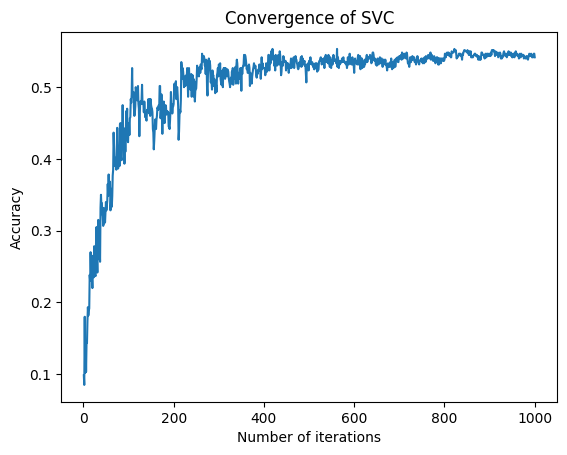

In [35]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()